In [1]:
import sys
print(sys.executable)


C:\Users\pc\myenv\Scripts\python.exe


In [1]:
#importation des bibliotheque necessaire
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np


In [2]:
#chargement du dataset "fashion mnist"
fashion_mnist = tf.keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

In [3]:
#noms des classes qu'on va travailler avec
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [4]:
#format des donnees avant de construire le modele
train_images.shape

(60000, 28, 28)

In [5]:
#format des libelles
len(train_labels)

60000

In [6]:
train_labels

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [7]:
#nombre des imges disponibles pour le test
test_images.shape

(10000, 28, 28)

In [8]:
#nombre d'etiquettes des images pour le test
len(test_labels)

10000

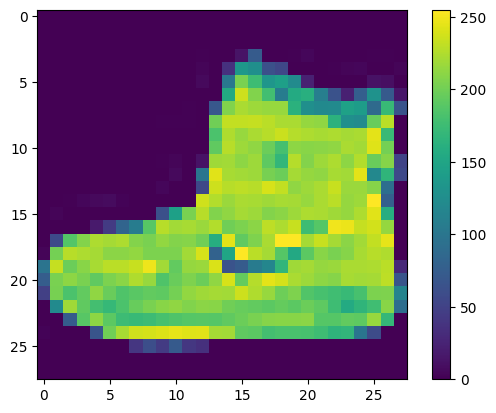

In [9]:
#affichage d'une images avant le pretraitement
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

In [10]:
#mettre les valeurs a l'echelle dans une plage de 0 a 1 avant l'alimentation du modele
train_images=train_images/255.0
test_images = test_images/255.0

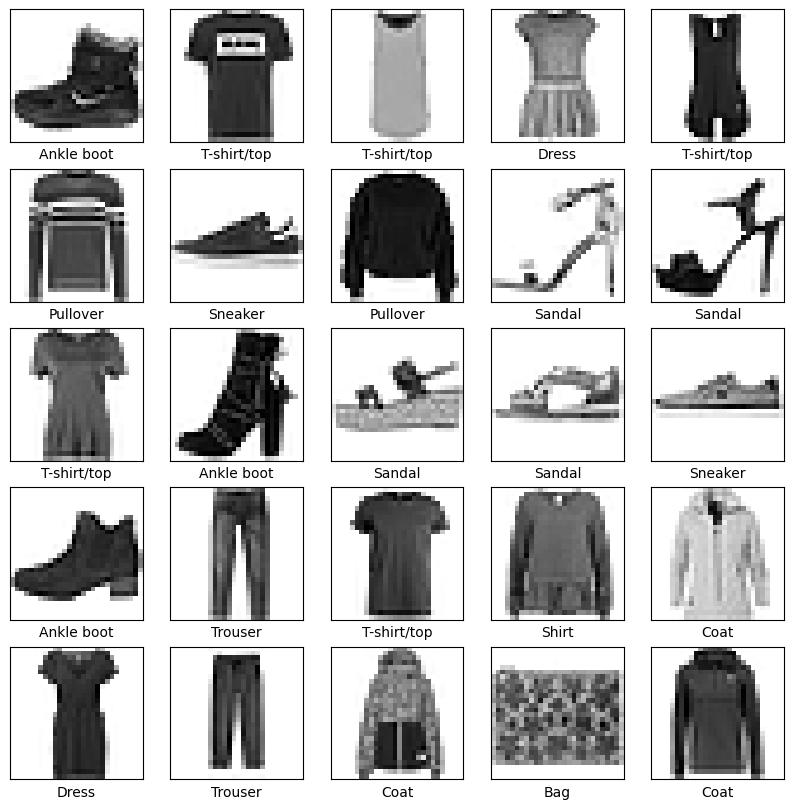

In [11]:
#affichage des 25 premiers images
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i],cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

In [12]:
#Ce code définit un modèle séquentiel en trois couches:une couche d'entrée spécifiant la forme (28, 28), suivie d'une couche dense avec 
#128 neurones et activation ReLU, et une couche de sortie avec 10 neurones.
model = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(28, 28)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation = 'relu'),
    tf.keras.layers.Dense(10)
])

In [13]:
#compilation du modele en utilisant un optimiseur et une fonction de perte ainsi que les metrics
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics= ['accuracy'])

In [14]:
#entrainement du modele: le modele s'entraine sur un epoch de 10
model.fit(train_images, train_labels, epochs=10)

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.7857 - loss: 0.6199
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8641 - loss: 0.3773
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.8778 - loss: 0.3362
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8861 - loss: 0.3112
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8925 - loss: 0.2903
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8964 - loss: 0.2792
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9006 - loss: 0.2679
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9066 - loss: 0.2478
Epoch 9/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9086 - loss: 0.2437
Epoch 10/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9144 - loss: 0.2300


In [15]:
#evaluation du precision:
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)
print('\n Test accuracy: ', test_acc)

313/313 - 0s - 1ms/step - accuracy: 0.8798 - loss: 0.3426

 Test accuracy:  0.879800021648407


In [16]:
#la prediction
probability_model= tf.keras.Sequential([
    tf.keras.layers.Softmax()
])

In [17]:
predictions = probability_model.predict(test_images)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 830us/step


In [18]:
predictions[0]

array([[0.03571429, 0.03571429, 0.03571429, 0.03571429, 0.03571429,
        0.03571429, 0.03571429, 0.03571429, 0.03571429, 0.03571429,
        0.03571429, 0.03571429, 0.03571429, 0.03571429, 0.03571429,
        0.03571429, 0.03571429, 0.03571429, 0.03571429, 0.03571429,
        0.03571429, 0.03571429, 0.03571429, 0.03571429, 0.03571429,
        0.03571429, 0.03571429, 0.03571429],
       [0.03571429, 0.03571429, 0.03571429, 0.03571429, 0.03571429,
        0.03571429, 0.03571429, 0.03571429, 0.03571429, 0.03571429,
        0.03571429, 0.03571429, 0.03571429, 0.03571429, 0.03571429,
        0.03571429, 0.03571429, 0.03571429, 0.03571429, 0.03571429,
        0.03571429, 0.03571429, 0.03571429, 0.03571429, 0.03571429,
        0.03571429, 0.03571429, 0.03571429],
       [0.03571429, 0.03571429, 0.03571429, 0.03571429, 0.03571429,
        0.03571429, 0.03571429, 0.03571429, 0.03571429, 0.03571429,
        0.03571429, 0.03571429, 0.03571429, 0.03571429, 0.03571429,
        0.03571429, 0.0357

In [19]:
np.argmax(predictions[0])

269

In [20]:
test_labels[0]

9

In [21]:
# Affiche l'image et ses prédictions
def plot_image(i, predictions_array, true_label, img):
    true_label_val = true_label[i]
    img_val = img[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(img_val, cmap=plt.cm.binary)
    
    predicted_label = np.argmax(predictions_array)
    
    # Vérifie que les labels sont dans la plage valide
    if predicted_label >= len(class_names) or true_label_val >= len(class_names):
        plt.xlabel("Label out of range", color='red')
        return
    
    # Colorie les labels selon si la prédiction est correcte
    color = 'blue' if predicted_label == true_label_val else 'red'
    plt.xlabel("{} {:2.0f}% ({})".format(
        class_names[predicted_label],
        100 * np.max(predictions_array),
        class_names[true_label_val]),
        color=color
    )

# Trace les barres des prédictions de classes
def plot_value_array(i, predictions_array, true_label):
    true_label_val = true_label[i]
    plt.grid(False)
    plt.xticks(range(10))  # Assure qu'il y a 10 ticks pour les 10 classes
    plt.yticks([])
    
    # Vérifie la forme de predictions_array
    if predictions_array.ndim != 1 or len(predictions_array) != 10:
        print(f"Shape of predictions_array: {predictions_array.shape}. Expected a vector of length 10.")
        return
    
    thisplot = plt.bar(range(10), predictions_array, color="#777777")
    plt.ylim([0, 1])  # Limite l'axe Y à la plage [0, 1] pour les probabilités
    predicted_label = np.argmax(predictions_array)  # La classe prédite
    thisplot[predicted_label].set_color('red')
    thisplot[true_label_val].set_color('blue')

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
Shape of predictions: (10000, 10)
Shape of predictions[0]: (10,)


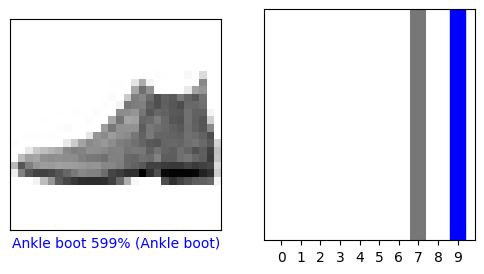

In [22]:
predictions = model.predict(test_images)  # test_images est l'ensemble de test
print(f"Shape of predictions: {predictions.shape}")  # Vérifier que predictions a la forme correcte

i = 0

# Vérifiez d'abord la forme des prédictions pour i = 0
print(f"Shape of predictions[{i}]: {predictions[i].shape}")

# Si predictions[i] est de forme (10,), alors vous pouvez passer directement à l'affichage
plt.figure(figsize=(6,3))
plt.subplot(1, 2, 1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1, 2, 2)
plot_value_array(i, predictions[i], test_labels)
plt.show()

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
Shape of predictions: (10000, 10)
Shape of predictions[12]: (10,)


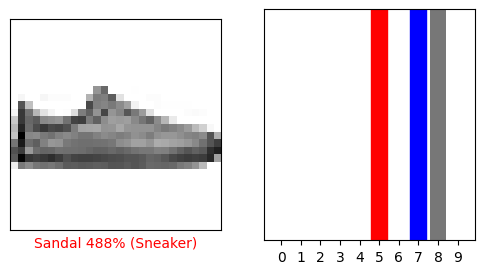

In [23]:
predictions = model.predict(test_images)  # test_images est l'ensemble de test
print(f"Shape of predictions: {predictions.shape}")  # Vérifier que predictions a la forme correcte

i = 12

# Vérifiez d'abord la forme des prédictions pour i = 0
print(f"Shape of predictions[{i}]: {predictions[i].shape}")

# Si predictions[i] est de forme (10,), alors vous pouvez passer directement à l'affichage
plt.figure(figsize=(6,3))
plt.subplot(1, 2, 1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1, 2, 2)
plot_value_array(i, predictions[i], test_labels)
plt.show()

In [24]:
img = test_images[1]
print(img.shape)

(28, 28)


In [25]:
img = (np.expand_dims(img,0))
print(img.shape)

(1, 28, 28)


In [26]:
predictions_single = probability_model.predict(img)
print(predictions_single)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
[[[0.03480668 0.03480668 0.03480668 0.03480668 0.03480668 0.03480668
   0.03480668 0.03480668 0.03480668 0.03480668 0.03662714 0.04526592
   0.03480668 0.03480668 0.03480668 0.03480668 0.04234658 0.04039996
   0.03480668 0.03480668 0.03480668 0.03480668 0.03480668 0.03480668
   0.03480668 0.03480668 0.03480668 0.03480668]
  [0.02191515 0.02191515 0.02191515 0.02191515 0.02191515 0.02191515
   0.02191515 0.02261359 0.03508474 0.04973884 0.05316779 0.05773166
   0.05551149 0.05957156 0.05957156 0.05957156 0.05773166 0.05572961
   0.05507781 0.04302099 0.0290649  0.02191515 0.02191515 0.02191515
   0.02191515 0.02191515 0.02191515 0.02191515]
  [0.01930592 0.01930592 0.01930592 0.01930592 0.01930592 0.01930592
   0.03303827 0.0492873  0.05186513 0.05006653 0.04833029 0.04739187
   0.04909439 0.05026325 0.05065902 0.04948096 0.04757809 0.04795272
   0.0492873  0.05105791 0.05166214 0.04131377 0.01930592 0.01930592
   0.01930592 0.01930592 0.01930592 0.

In [27]:
predictions_single = probability_model.predict(img)
print(predictions_single)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
[[[0.03480668 0.03480668 0.03480668 0.03480668 0.03480668 0.03480668
   0.03480668 0.03480668 0.03480668 0.03480668 0.03662714 0.04526592
   0.03480668 0.03480668 0.03480668 0.03480668 0.04234658 0.04039996
   0.03480668 0.03480668 0.03480668 0.03480668 0.03480668 0.03480668
   0.03480668 0.03480668 0.03480668 0.03480668]
  [0.02191515 0.02191515 0.02191515 0.02191515 0.02191515 0.02191515
   0.02191515 0.02261359 0.03508474 0.04973884 0.05316779 0.05773166
   0.05551149 0.05957156 0.05957156 0.05957156 0.05773166 0.05572961
   0.05507781 0.04302099 0.0290649  0.02191515 0.02191515 0.02191515
   0.02191515 0.02191515 0.02191515 0.02191515]
  [0.01930592 0.01930592 0.01930592 0.01930592 0.01930592 0.01930592
   0.03303827 0.0492873  0.05186513 0.05006653 0.04833029 0.04739187
   0.04909439 0.05026325 0.05065902 0.04948096 0.04757809 0.04795272
   0.0492873  0.05105791 0.05166214 0.04131377 0.01930592 0.01930592
   0.01930592 0.01930592 0.01930592 0.

In [28]:
def predict(model, img):
    img_array = tf.keras.preprocessing.image.img_to_array(images[i].numpy())
    img_array = tf.expand_dims(img_array, 0) #create a batch
    predictions = model.predict(img_array)
    predicted_class = class_names[np.argmax(predictions[0])]
    confidence = round(100 * (np.max(predictions[0])),2)
    return predicted_class, confidence

In [38]:
# Sauvegarder le modèle au format TensorFlow SavedModel
#model.export('saved_model_directory')  # Utilisez export pour SavedModel

# Conversion en TensorFlow Lite depuis le répertoire SavedModel
#converter = tf.lite.TFLiteConverter.from_saved_model('saved_model_directory')
#tflite_model = converter.convert()

# Sauvegarder le modèle converti au format TFLite
#with open('model.tflite', 'wb') as f:
#    f.write(tflite_model)

#print("Modèle sauvegardé et converti avec succès en TFLite.")


INFO:tensorflow:Assets written to: saved_model_directory\assets


INFO:tensorflow:Assets written to: saved_model_directory\assets


Saved artifact at 'saved_model_directory'. The following endpoints are available:

* Endpoint 'serve'
  args_0 (POSITIONAL_ONLY): TensorSpec(shape=(None, 28, 28), dtype=tf.float32, name='keras_tensor')
Output Type:
  TensorSpec(shape=(None, 10), dtype=tf.float32, name=None)
Captures:
  2124197751344: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2124198104752: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2124198103168: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2124198106160: TensorSpec(shape=(), dtype=tf.resource, name=None)
Modèle sauvegardé et converti avec succès en TFLite.


In [29]:
import os
print(os.path.abspath('saved_model_directory'))


C:\Users\pc\Downloads\DeepLearning\saved_model_directory


In [30]:
model.export('fashion_mnist_directory')  # Utilisez export pour SavedModel

# Conversion en TensorFlow Lite depuis le répertoire SavedModel
converter = tf.lite.TFLiteConverter.from_saved_model('saved_model_directory')
tflite_model = converter.convert()

# Sauvegarder le modèle converti au format TFLite
with open('model.tflite', 'wb') as f:
      f.write(tflite_model)
 

print("Modèle sauvegardé et converti avec succès en TFLite.")

INFO:tensorflow:Assets written to: fashion_mnist_directory\assets


INFO:tensorflow:Assets written to: fashion_mnist_directory\assets


Saved artifact at 'fashion_mnist_directory'. The following endpoints are available:

* Endpoint 'serve'
  args_0 (POSITIONAL_ONLY): TensorSpec(shape=(None, 28, 28), dtype=tf.float32, name='keras_tensor')
Output Type:
  TensorSpec(shape=(None, 10), dtype=tf.float32, name=None)
Captures:
  3162592343344: TensorSpec(shape=(), dtype=tf.resource, name=None)
  3162999752656: TensorSpec(shape=(), dtype=tf.resource, name=None)
  3162999753184: TensorSpec(shape=(), dtype=tf.resource, name=None)
  3162999756352: TensorSpec(shape=(), dtype=tf.resource, name=None)
Modèle sauvegardé et converti avec succès en TFLite.


In [32]:
# Charger le dataset de test (ici nous utilisons le dataset Fashion MNIST à titre d'exemple)
(test_images, test_labels), _ = tf.keras.datasets.fashion_mnist.load_data()
test_images = test_images / 255.0  # Normaliser les images

# Créer un dataset de test TensorFlow
test_ds = tf.data.Dataset.from_tensor_slices((test_images, test_labels)).batch(32)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


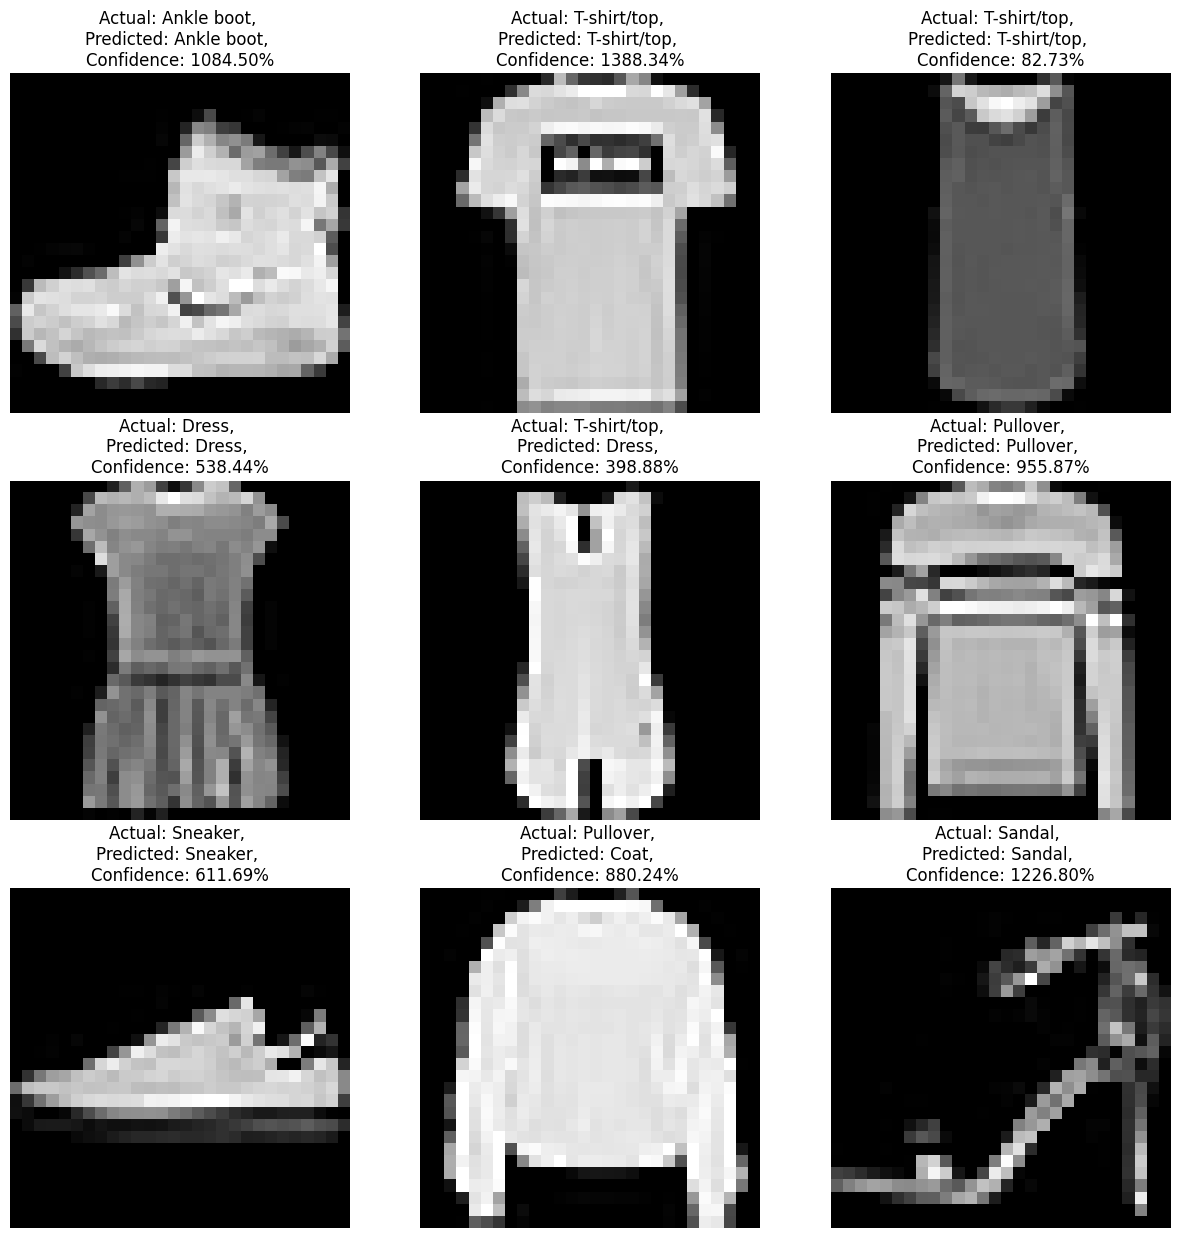

In [34]:


# Fonction de prédiction
def predict(model, image):
    image = tf.expand_dims(image, axis=0)  # Ajouter une dimension pour le lot
    predictions = model.predict(image)
    predicted_class = class_names[tf.argmax(predictions[0])]
    confidence = tf.reduce_max(predictions[0]) * 100  # Confiance en pourcentage
    return predicted_class, confidence

# Charger le dataset de test (ici nous utilisons le dataset Fashion MNIST à titre d'exemple)
(test_images, test_labels), _ = tf.keras.datasets.fashion_mnist.load_data()
test_images = test_images / 255.0  # Normaliser les images

# Créer un dataset de test TensorFlow
test_ds = tf.data.Dataset.from_tensor_slices((test_images, test_labels)).batch(32)

plt.figure(figsize=(15, 15))
for images, labels in test_ds.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i], cmap='gray')
        predicted_class, confidence = predict(model, images[i])
        actual_class = class_names[labels[i]]
        plt.title(f"Actual: {actual_class}, \nPredicted: {predicted_class}, \nConfidence: {confidence:.2f}%")
        plt.axis('off')

plt.show()

In [36]:
model.export('fashion_mnist_directory')  # Utilisez export pour SavedModel

# Conversion en TensorFlow Lite depuis le répertoire SavedModel
converter = tf.lite.TFLiteConverter.from_saved_model('saved_model_directory')
tflite_model = converter.convert()

# Sauvegarder le modèle converti au format TFLite
with open('model2.tflite', 'wb') as f:
      f.write(tflite_model)
 

print("Modèle sauvegardé et converti avec succès en TFLite.")

INFO:tensorflow:Assets written to: fashion_mnist_directory\assets


INFO:tensorflow:Assets written to: fashion_mnist_directory\assets


Saved artifact at 'fashion_mnist_directory'. The following endpoints are available:

* Endpoint 'serve'
  args_0 (POSITIONAL_ONLY): TensorSpec(shape=(None, 28, 28), dtype=tf.float32, name='keras_tensor')
Output Type:
  TensorSpec(shape=(None, 10), dtype=tf.float32, name=None)
Captures:
  3162592343344: TensorSpec(shape=(), dtype=tf.resource, name=None)
  3162999752656: TensorSpec(shape=(), dtype=tf.resource, name=None)
  3162999753184: TensorSpec(shape=(), dtype=tf.resource, name=None)
  3162999756352: TensorSpec(shape=(), dtype=tf.resource, name=None)
Modèle sauvegardé et converti avec succès en TFLite.
